# Customer Behavior Analysis

## Primary Questions:

### - How can we improve ou sales?

- What our customers are looking for on Amazon? What are the problems clients are complaning about amazon? how to solve?

- Can we separate our customers in groups and recommendate them what other on the same group bhought?

In [58]:
import pandas as pd
import numpy as np

In [59]:
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
df.head(10)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
5,2023/06/04 6:01:59 PM GMT+5:30,21,Female,Less than once a month,Clothing and Fashion,No,Rarely,categories,Multiple pages,1,...,Never,No,Heavily,Yes,5,No,5,2,Wide product selection,Product quality and accuracy
6,2023/06/04 6:31:41 PM GMT+5:30,22,Female,Less than once a month,Clothing and Fashion,No,Rarely,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Sometimes,3,3,Wide product selection,Shipping speed and reliability
7,2023/06/04 7:13:12 PM GMT+5:30,21,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Sometimes,3,Sometimes,1,3,Competitive prices,Shipping speed and reliability
8,2023/06/04 7:23:21 PM GMT+5:30,20,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Sometimes,Few times a month,Keyword,First page,1,...,Often,No,Moderately,Yes,2,Yes,2,2,Wide product selection,Reducing packaging waste
9,2023/06/04 7:33:12 PM GMT+5:30,23,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,No,Rarely,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,3,Yes,3,4,Wide product selection,Product quality and accuracy


### Checking and cleaning the dataset

In [60]:
df.shape

(602, 23)

In [61]:
print(f'Valores na: {df.isna().sum()}\n')
print('===========================================================')
print(f'\n\nColunas: {df.columns}')

Valores na: Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas   

In [62]:
df = df.fillna(0)

In [63]:
df = df.rename(columns={'Personalized_Recommendation_Frequency ': 'Qtd_Personalized_Recommendation_Frequency'})

In [64]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Timestamp                                  602 non-null    object
 1   age                                        602 non-null    int64 
 2   Gender                                     602 non-null    object
 3   Purchase_Frequency                         602 non-null    object
 4   Purchase_Categories                        602 non-null    object
 5   Personalized_Recommendation_Frequency      602 non-null    object
 6   Browsing_Frequency                         602 non-null    object
 7   Product_Search_Method                      602 non-null    object
 8   Search_Result_Exploration                  602 non-null    object
 9   Customer_Reviews_Importance                602 non-null    int64 
 10  Add_to_Cart_Browsing                  

In [65]:
lista_obj_col = ['Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',\
    'Personalized_Recommendation_Frequency', 'Saveforlater_Frequency', \
    'Review_Left', 'Review_Reliability', 'Review_Helpfulness',\
    'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas']

for i in lista_obj_col:
    print('\n===========================================================\
=================================================================')
    print(f'\n{i}: {(df[i]).unique()}')



Add_to_Cart_Browsing: ['Yes' 'Maybe' 'No']


Cart_Completion_Frequency: ['Sometimes' 'Often' 'Rarely' 'Never' 'Always']


Cart_Abandonment_Factors: ['Found a better price elsewhere' 'High shipping costs'
 'Changed my mind or no longer need the item' 'others']


Personalized_Recommendation_Frequency: ['Yes' 'No' 'Sometimes']


Saveforlater_Frequency: ['Sometimes' 'Rarely' 'Never' 'Often' 'Always']


Review_Left: ['Yes' 'No']


Review_Reliability: ['Occasionally' 'Heavily' 'Moderately' 'Never' 'Rarely']


Review_Helpfulness: ['Yes' 'No' 'Sometimes']


Recommendation_Helpfulness: ['Yes' 'Sometimes' 'No']


Service_Appreciation: ['Competitive prices' 'Wide product selection'
 'User-friendly website/app interface' '.' 'Customer service '
 'Product recommendations' 'Customer service' 'Quick delivery'
 'All the above']


Improvement_Areas: ['Reducing packaging waste' 'Product quality and accuracy'
 'Shipping speed and reliability' 'Customer service responsiveness' '.'
 'Nothing' 'better app

In [66]:
df_split = df['Purchase_Categories'].str.split(';', expand=True)

df_split.columns = [f'Purchase_Categories_{i+1}' for i in range(df_split.shape[1])]

df = pd.concat([df.drop(columns=['Purchase_Categories']), df_split], axis=1)

print(df)


                          Timestamp  age             Gender  \
0    2023/06/04 1:28:19 PM GMT+5:30   23             Female   
1    2023/06/04 2:30:44 PM GMT+5:30   23             Female   
2    2023/06/04 5:04:56 PM GMT+5:30   24  Prefer not to say   
3    2023/06/04 5:13:00 PM GMT+5:30   24             Female   
4    2023/06/04 5:28:06 PM GMT+5:30   22             Female   
..                              ...  ...                ...   
597  2023/06/12 4:02:02 PM GMT+5:30   23             Female   
598  2023/06/12 4:02:53 PM GMT+5:30   23             Female   
599  2023/06/12 4:03:59 PM GMT+5:30   23             Female   
600  2023/06/12 9:57:20 PM GMT+5:30   23             Female   
601  2023/06/16 9:16:05 AM GMT+5:30   23             Female   

         Purchase_Frequency Personalized_Recommendation_Frequency  \
0         Few times a month                                   Yes   
1              Once a month                                   Yes   
2         Few times a month         

In [67]:
df['Purchase_Categories_1']

0        Beauty and Personal Care
1            Clothing and Fashion
2      Groceries and Gourmet Food
3        Beauty and Personal Care
4        Beauty and Personal Care
                  ...            
597      Beauty and Personal Care
598          Clothing and Fashion
599      Beauty and Personal Care
600      Beauty and Personal Care
601          Clothing and Fashion
Name: Purchase_Categories_1, Length: 602, dtype: object

In [68]:
df.describe()

,age,Customer_Reviews_Importance,Qtd_Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [69]:
df['Add_to_Cart_Browsing'].value_counts()

Add_to_Cart_Browsing
Maybe    248
Yes      216
No       138
Name: count, dtype: int64

In [70]:
def count_col_values(df, col):
    sub_df = df[col].value_counts() # conta a frequência de cada categoria
    sub_df = pd.DataFrame(sub_df)   # transfor em um dataframe
    sub_df.columns = ['Count']      # nomeia a coluna de contagens
    
    # Resetando o índice para transformar o índice atual em uma coluna normal
    sub_df = sub_df.reset_index()
    
    # Reanomeando o índice para o nome da coluna q foi passado
    sub_df.rename(columns={'index': f'{col}'}, inplace=True)
    
    return sub_df

# Teste: count_col_values(df, 'Add_to_Cart_Browsing')

In [71]:
count_col_values(df, 'Shopping_Satisfaction')

,Shopping_Satisfaction,Count
0,3,209
1,2,194
2,1,115
3,4,67
4,5,17


In [72]:
# Correcting datetype
df['Timestamp'] = df['Timestamp'].str.replace(' GMT+5:30', '', regex=False)

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d %I:%M:%S %p',
                                 errors='coerce')

In [73]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Purchase_Categories_1,Purchase_Categories_2,Purchase_Categories_3,Purchase_Categories_4,Purchase_Categories_5
0,2023-06-04 13:28:19,23,Female,Few times a month,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Yes,1,1,Competitive prices,Reducing packaging waste,Beauty and Personal Care,None,None,None,None
1,2023-06-04 14:30:44,23,Female,Once a month,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,3,2,Wide product selection,Reducing packaging waste,Clothing and Fashion,None,None,None,None
2,2023-06-04 17:04:56,24,Prefer not to say,Few times a month,No,Few times a month,Keyword,Multiple pages,2,Yes,...,No,3,3,Competitive prices,Product quality and accuracy,Groceries and Gourmet Food,Clothing and Fashion,None,None,None
3,2023-06-04 17:13:00,24,Female,Once a month,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,3,4,Competitive prices,Product quality and accuracy,Beauty and Personal Care,Clothing and Fashion,others,None,None
4,2023-06-04 17:28:06,22,Female,Less than once a month,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Yes,2,2,Competitive prices,Product quality and accuracy,Beauty and Personal Care,Clothing and Fashion,None,None,None


### Making some Analysis

In [74]:
import matplotlib.pyplot as plt
import plotly.express as px

In [75]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Personalized_Recommendation_Frequency', 'Browsing_Frequency',
       'Product_Search_Method', 'Search_Result_Exploration',
       'Customer_Reviews_Importance', 'Add_to_Cart_Browsing',
       'Cart_Completion_Frequency', 'Cart_Abandonment_Factors',
       'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability',
       'Review_Helpfulness', 'Qtd_Personalized_Recommendation_Frequency',
       'Recommendation_Helpfulness', 'Rating_Accuracy ',
       'Shopping_Satisfaction', 'Service_Appreciation', 'Improvement_Areas',
       'Purchase_Categories_1', 'Purchase_Categories_2',
       'Purchase_Categories_3', 'Purchase_Categories_4',
       'Purchase_Categories_5'],
      dtype='object')

* Looking for the issues our clients are reporting

In [76]:
# How does reducing these complaints can improve our sales?
# 'Shopping_Satisfaction', 'Service_Appreciation', 'Purchase_Frequency'

In [77]:
# 1 for low satisfaction and 5 for high satisfation
df['Shopping_Satisfaction'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [78]:
df['Shopping_Satisfaction'].mean()

2.463455149501661

In [79]:
df_satisfactions = (count_col_values(df, 'Shopping_Satisfaction')).sort_values(by='Count', ascending=False)
df_satisfactions

,Shopping_Satisfaction,Count
0,3,209
1,2,194
2,1,115
3,4,67
4,5,17


In [80]:
import statistics as st

m = df['Shopping_Satisfaction'].mean()
st_dev = st.stdev(df['Shopping_Satisfaction'])
w_m = ( 1*115 + 2*194 + 3*209 + 4*67 + 5*17) / (115 + 194 + 209 + 67 + 17)
variance = st.pvariance(df['Shopping_Satisfaction'])
median = st.median(df['Shopping_Satisfaction'])
mean_harm = st.harmonic_mean(df['Shopping_Satisfaction'])


print(f'Mean: {m}\nweighted average: {w_m} \
        \nstandard deviation: {st_dev} \
        \nVariance: {variance}\nMedian: {median} \
        \nMédia harmonica: {mean_harm}')

Mean: 2.463455149501661
weighted average: 2.463455149501661         
standard deviation: 1.012152459438045         
Variance: 1.0227508526395956
Median: 2.0         
Média harmonica: 1.9945883262466177


### The simple average and the weighted average are the same, so we can conclude that, in this case, the weights did not interfere. Let's assume that Amazon wants to increase the average purchase satisfaction, to do this, we have to analyze the points to improve and the strengths according to the users' response.

* Looking for satisfaction level between ou customers

In [81]:
def process_improvement_areas(df):
    sub_df = count_col_values(df, 'Improvement_Areas')  # Usar a função de contagem

    # Substituir todas as categorias com Count == 1 por "Others"
    sub_df.loc[sub_df['Count'] == 1, 'Improvement_Areas'] = 'Others'

    # Recalcular os valores, somando todos os 'Others'
    sub_df = sub_df.groupby('Improvement_Areas')['Count'].sum().reset_index()    
    sub_df = sub_df.sort_values(by='Count', ascending=False)
    
    return sub_df

In [82]:
df_improvement = process_improvement_areas(df)
df_improvement = df_improvement.rename(columns={'Count': 'CountI'})


In [83]:
df_improvement

,Improvement_Areas,CountI
0,Customer service responsiveness,217
2,Product quality and accuracy,159
3,Reducing packaging waste,133
4,Shipping speed and reliability,79
1,Others,14


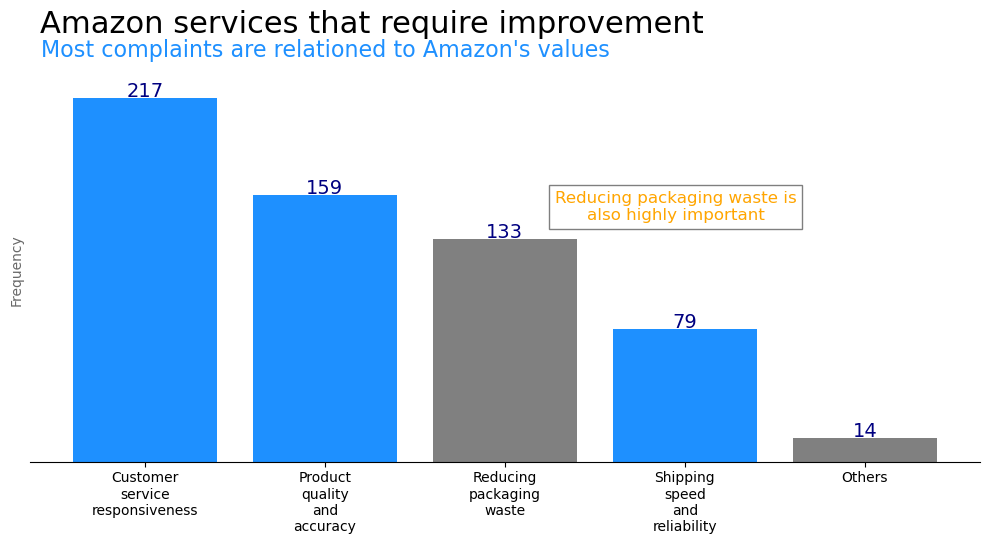

In [84]:
# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_improvement['Improvement_Areas'], df_improvement['CountI'],
       color=['dodgerblue', 'dodgerblue', 'grey','dodgerblue', 'grey'] )

# Removing lines
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# adding values to columns
for i, v in enumerate(df_improvement['CountI']):
    ax.text(i, v + 0.5, str(v), ha='center', color='navy', fontsize=14)

# Title
plt.title('Amazon services that require improvement',  fontweight='roman', 
          fontsize=22, x=0.36, y=1.1)

plt.suptitle("Most complaints are relationed to Amazon's values", x=0.33, y=0.85, 
             fontweight='light', color='dodgerblue', fontsize=16)

ax.set_ylabel('Frequency', color='dimgray')
ax.set_xlabel('')

# Ajustando as variáveis do eixo X
new_labels = [label.replace(' ', '\n') for label in df_improvement['Improvement_Areas']]
ax.set_xticks(range(len(new_labels)))  # Ajustar ticks
ax.set_xticklabels(new_labels, ha='center')

# Adicionar insights ao gráfico
insight_text = "Reducing packaging waste is\nalso highly important"
ax.text(2.95, max(df_improvement['CountI']) * 0.7, insight_text, 
        ha='center', va='center', fontsize=12, color='orange', 
        bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

### What steps can we take if we reduce customer service responsiveness and product quality complaints by 20%? We can achieve this progressively—1% in the first month, 2% in the second month, and so on, reaching 19% after six months. By reducing packaging waste, we can also lower costs, allowing us to allocate more resources to address the areas that need the most improvement. Additionally, we can enhance our shipping speed, which is one of our key differentiator.

In [85]:
## preciso ver como diminuir as reclamações pode impactar a satisfação dos clientes
## correlation = 0.513962



# 6 months later

# case 1:   -19%

"""
['Customer service responsiveness'] = 178

['Product quality and accuracy'] = 129
"""

# case 2:   - waste    + shipping speed

"\n['Customer service responsiveness'] = 178\n\n['Product quality and accuracy'] = 129\n"

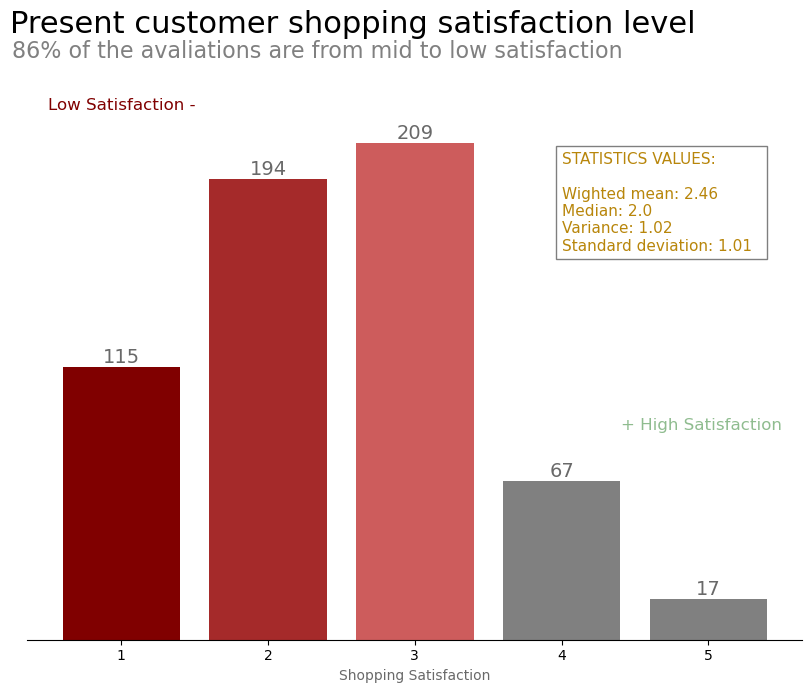

In [86]:
# plotar dois gráficos para comparar o resultado atual e o após 
# a implementação dos -19% de reclamação

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,8))


bars = ax.bar(df_satisfactions['Shopping_Satisfaction'], df_satisfactions['Count'], \
    color=['indianred', 'brown', 'maroon', 'grey', 'grey'])

# Removing lines
ax.set_yticks([])
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# adding values to columns with alligment
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
            ha='center', va='bottom', color='dimgray', fontsize=14)
    
# Title
plt.title('Present customer shopping satisfaction level',  fontweight='roman', 
          fontsize=22, x=0.42, y=1.1)

plt.suptitle("86% of the avaliations are from mid to low satisfaction", x=0.415, y=0.95, 
             fontweight='light', color='grey', fontsize=16)

ax.set_xlabel('Shopping Satisfaction', color='dimgrey')
ax.set_ylabel('')

# Legend
plt.text(+0.5, 225, 'Low Satisfaction -', ha='left', va='center', fontsize=12, color='maroon')
plt.text(len(df_satisfactions['Shopping_Satisfaction']) +0.5, 90, '+ High Satisfaction', 
         ha='right', va='center', fontsize=12, color='darkseagreen')

# Adjusting the graph limits
plt.ylim(0, max(df_satisfactions['Count']) + 20)
plt.subplots_adjust(bottom=0.2)  # Ajusta o gráfico para abrir mais espaço na parte inferior

# Adding insights 
insight_text = (f'STATISTICS VALUES:\
        \n\nWighted mean: {round(w_m, 2)} \
        \nMedian: {round(median, 2)} \nVariance: {round(variance, 2)} \
        \nStandard deviation: {round(st_dev, 2)}')
ax.text(4, max(df_satisfactions['Count']) * 0.88, insight_text, ha='left', \
    va='center', fontsize=11, color='darkgoldenrod', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

### Understanding how Satisfaction is related to services that require improvement

In [87]:
# ver a correlação entre shopping satisfaction e improvement areas
filtered_df = df[['age', 'Customer_Reviews_Importance', \
    'Rating_Accuracy ', 'Shopping_Satisfaction', 'Qtd_Personalized_Recommendation_Frequency']]

corr_df = filtered_df.corr()

corr_df

,age,Customer_Reviews_Importance,Rating_Accuracy,Shopping_Satisfaction,Qtd_Personalized_Recommendation_Frequency
age,1.000000,0.077193,-0.010202,0.003934,-0.018937
Customer_Reviews_Importance,0.077193,1.000000,0.314513,0.402317,0.313761
Rating_Accuracy,-0.010202,0.314513,1.000000,0.513962,0.437943
Shopping_Satisfaction,0.003934,0.402317,0.513962,1.000000,0.438395
Qtd_Personalized_Recommendation_Frequency,-0.018937,0.313761,0.437943,0.438395,1.000000


In [88]:
"""
0.8 ≤ |r| ≤ 1.0: correlação forte.
0.5 ≤ |r| < 0.8: correlação moderada.
0.3 ≤ |r| < 0.5: correlação fraca.
0.0 ≤ |r| < 0.3: correlação desprezível.
"""

'\n0.8 ≤ |r| ≤ 1.0: correlação forte.\n0.5 ≤ |r| < 0.8: correlação moderada.\n0.3 ≤ |r| < 0.5: correlação fraca.\n0.0 ≤ |r| < 0.3: correlação desprezível.\n'

<Axes: >

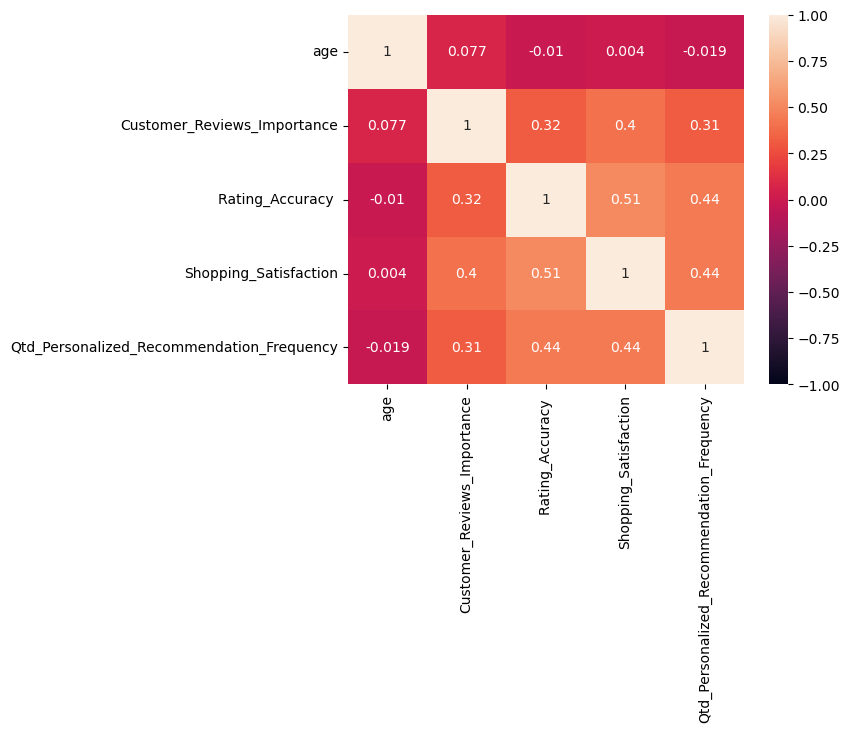

In [89]:
import seaborn as sns
sns.heatmap(filtered_df.corr().round(3), annot=True, vmin=-1,vmax=1)

In [90]:
df_analysis1 = df_improvement.join(df_satisfactions)
df_analysis1

,Improvement_Areas,CountI,Shopping_Satisfaction,Count
0,Customer service responsiveness,217,3,209
2,Product quality and accuracy,159,1,115
3,Reducing packaging waste,133,4,67
4,Shipping speed and reliability,79,5,17
1,Others,14,2,194


<Axes: >

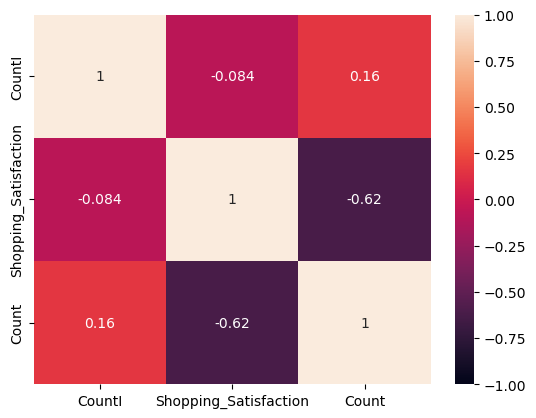

In [91]:
sns.heatmap(df_analysis1[['CountI', 'Shopping_Satisfaction', 'Count']].corr().round(3), annot=True, vmin=-1,vmax=1)

In [92]:
from sklearn.preprocessing import LabelEncoder

# Copiar o dataframe original
df_encoded = df.copy()

# Pré-processar colunas categóricas, garantindo que todos os valores sejam strings antes de codificar
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':  # Se a coluna for categórica (tipo 'object')
        df_encoded[column] = df_encoded[column].astype(str)  # Converter para string
        df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])  # Codificar a coluna

# Calcular a correlação com a coluna 'Shopping_Satisfaction'
correlation_matrix = df_encoded.corr()
shopping_satisfaction_correlation = correlation_matrix['Shopping_Satisfaction'].sort_values(ascending=False)

# Exibir as correlações
print(shopping_satisfaction_correlation)


Shopping_Satisfaction                        1.000000
Rating_Accuracy                              0.513962
Qtd_Personalized_Recommendation_Frequency    0.438395
Customer_Reviews_Importance                  0.402317
Purchase_Categories_2                        0.215010
Product_Search_Method                        0.205402
Review_Reliability                           0.204115
Purchase_Categories_3                        0.147148
Timestamp                                    0.139836
Cart_Abandonment_Factors                     0.113294
Purchase_Categories_4                        0.111709
Saveforlater_Frequency                       0.082143
Gender                                       0.068934
Cart_Completion_Frequency                    0.057224
Purchase_Frequency                           0.016256
Service_Appreciation                         0.012141
age                                          0.003934
Browsing_Frequency                          -0.001387
Purchase_Categories_1       

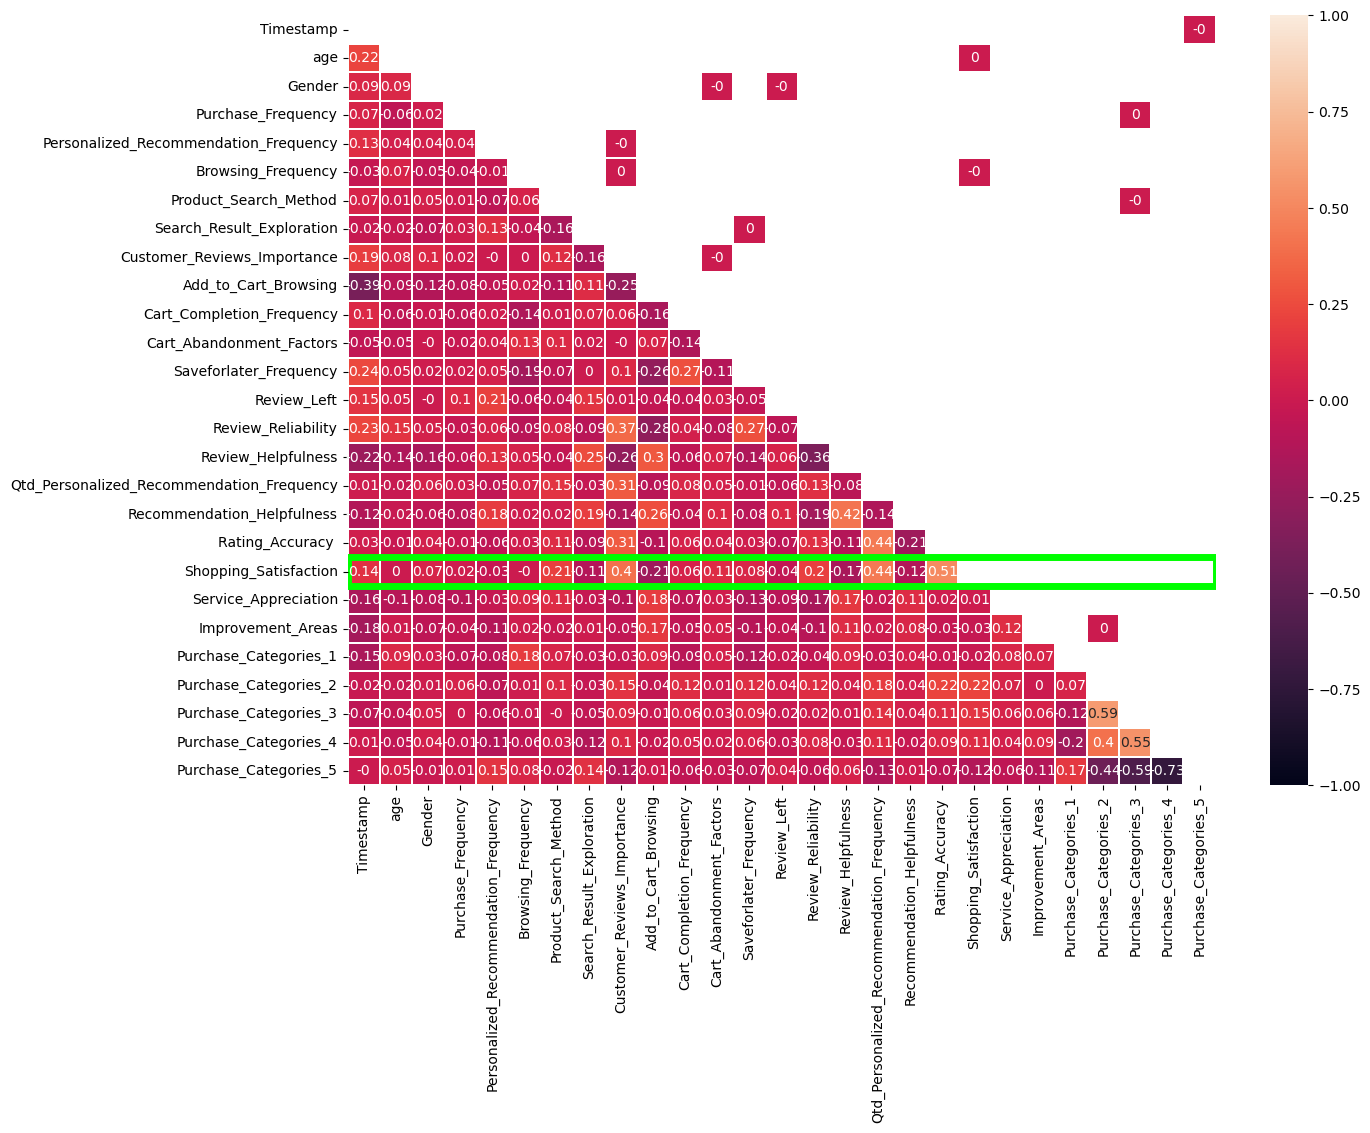

In [93]:
plt.figure(figsize=(14, 10))
correlation_matrix = df_encoded.corr().round(2)
heatmap = sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, linewidths=0.3, mask=np.triu(correlation_matrix))


for i in range(len(correlation_matrix.columns)):
    if correlation_matrix.index[i] == 'Shopping_Satisfaction':
        heatmap.add_patch(plt.Rectangle((0, i), len(correlation_matrix), 1, fill=False, edgecolor='lime', lw=5))

plt.show()

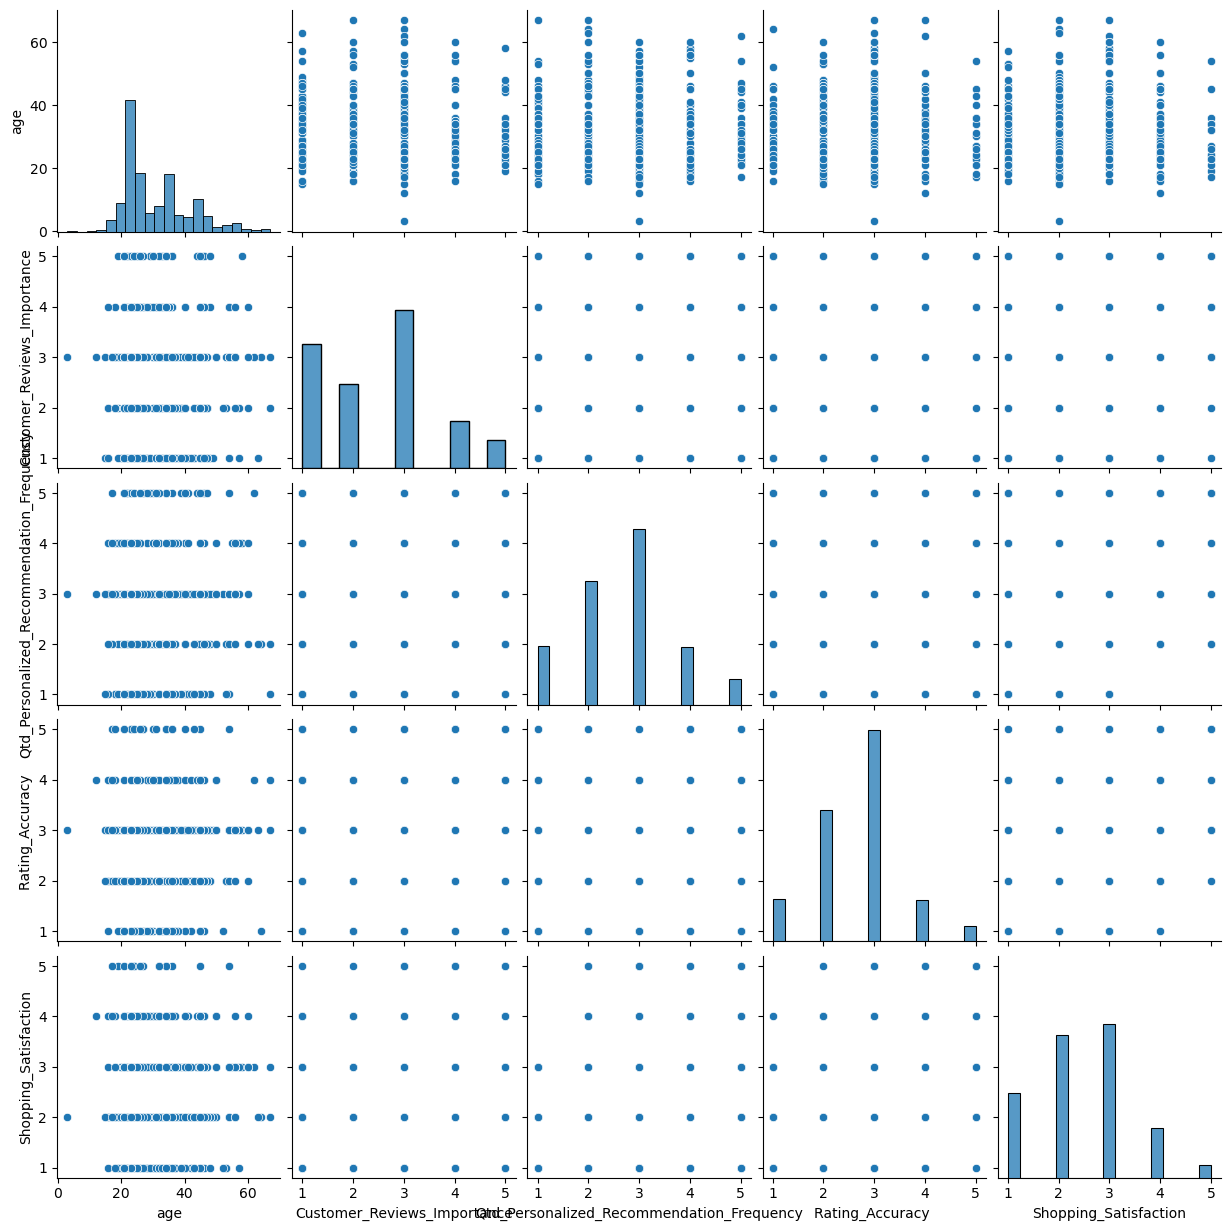

In [94]:
sns.pairplot(df)

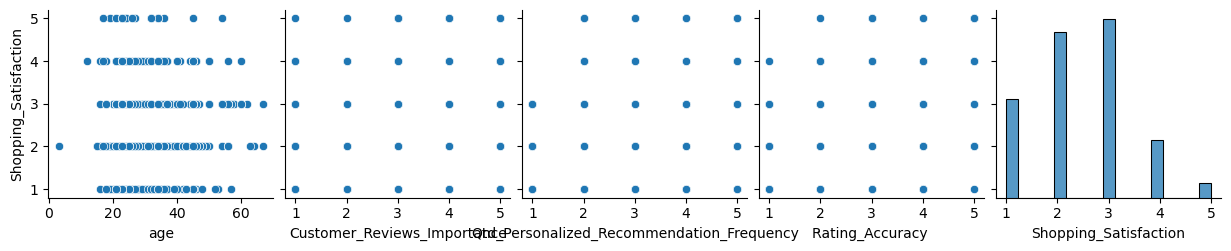

In [95]:
sns.pairplot(df, y_vars='Shopping_Satisfaction')

# Modelo

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor                       # modelo de regressão
from sklearn.preprocessing import StandardScaler, OneHotEncoder          # pré-processamento de dados
from sklearn.compose import ColumnTransformer                            # aplica diferentes transformações no df
from sklearn.pipeline import Pipeline                                    # avalia o desempenho do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar o dataset e garantir que todos os dados categóricos são strings
categ  = ['Purchase_Frequency', 'Personalized_Recommendation_Frequency',
          'Browsing_Frequency',  'Product_Search_Method', 'Search_Result_Exploration',
          'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Cart_Abandonment_Factors', 
          'Saveforlater_Frequency', 'Review_Left', 'Review_Reliability', 'Review_Helpfulness',
          'Recommendation_Helpfulness', 'Service_Appreciation', 'Improvement_Areas',
          'Purchase_Categories_1', 'Purchase_Categories_2', 'Purchase_Categories_3', 
          'Purchase_Categories_4', 'Purchase_Categories_5']

# Converte colunas categóricas para string
""" Utilizamos astype(str) para converter todas essas colunas para o tipo string. 
Isso é essencial porque o OneHotEncoder exige que todos os dados categóricos 
estejam no formato string para funcionar corretamente."""
df[categ] = df[categ].astype(str)

# Definir variáveis independentes (X) e dependentes (y)
X = df.drop('Shopping_Satisfaction', axis=1)
y = df['Shopping_Satisfaction']                 # variável alvo

# Dividir os dados em teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listar colunas numéricas e categóricas
numer = ['Customer_Reviews_Importance', 'Qtd_Personalized_Recommendation_Frequency']

# Pipeline para processamento de dados
preprocessor = ColumnTransformer( # aplica diferentes transformações às colunas numéricas e categóricas.
    transformers=[
        ('num', StandardScaler(), numer), # Normaliza as colunas numéricas para que tenham média 0 e desvio padrão 1.

        ('cat', OneHotEncoder(handle_unknown='ignore'), categ) #Codifica as colunas categóricas em uma matriz binária. 
                                                               #handle_unknown='ignore' garante que quaisquer categorias 
                                                               # desconhecidas que apareçam no conjunto de teste sejam 
                                                               # ignoradas, evitando erros.
    ])

# Modelo
model = Pipeline(steps=[ # Permite encadear várias transformações seguidas do modelo final, criando um fluxo de trabalho unificado.
    ('preprocessor', preprocessor),                        # O transformador de colunas que definimos anteriormente.
    ('regressor', RandomForestRegressor(random_state=42))  # Modelo de regressão de Floresta Aleatória.
])

# Treinar o modelo
model.fit(X_train, y_train)

array([1.9 , 3.08, 3.03, 2.06, 1.8 , 1.63, 2.46, 2.9 , 2.42, 2.4 , 2.69,
       2.01, 1.72, 2.94, 2.23, 2.26, 1.67, 1.63, 2.26, 3.21, 2.5 , 2.74,
       3.09, 2.95, 1.51, 3.07, 1.78, 1.24, 1.72, 3.08, 2.98, 2.15, 2.85,
       2.17, 3.26, 2.36, 1.15, 2.57, 2.59, 2.37, 2.46, 3.15, 2.02, 3.13,
       2.6 , 2.85, 2.83, 1.19, 2.35, 3.15, 2.23, 2.02, 3.12, 2.22, 3.49,
       3.06, 2.34, 3.14, 4.44, 2.12, 2.95, 1.77, 1.84, 1.79, 2.84, 1.67,
       2.76, 2.81, 1.97, 2.4 , 2.03, 2.38, 2.23, 1.76, 2.73, 2.01, 1.44,
       2.03, 3.08, 2.55, 3.2 , 2.27, 1.55, 1.7 , 2.52, 2.65, 1.89, 1.88,
       3.78, 3.04, 2.22, 1.92, 3.1 , 2.21, 3.08, 2.89, 2.11, 2.08, 1.61,
       3.23, 3.12, 1.96, 2.27, 2.71, 2.55, 2.12, 2.71, 1.98, 2.17, 2.97,
       3.1 , 2.94, 3.51, 3.39, 2.98, 2.88, 1.15, 2.13, 2.57, 2.21, 1.84])

## Encontrando o melhor hiperparâmetro

In [ ]:
# Definir a grade de hiperparâmetros 
param_grid = { 'regressor__n_estimators': [100, 200, 300], 
              'regressor__max_depth': [None, 10, 20, 30], 
              'regressor__min_samples_split': [2, 5, 10], 
              'regressor__min_samples_leaf': [1, 2, 4] } 

# GridSearchCV para buscar os melhores hiperparâmetros 
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#            param_grid:    Define a grade de hiperparâmetros para a busca.
#            cv=5:   Usa 5 divisões para validação cruzada.
#            scoring='neg_mean_squared_error':   Métrica para avaliar o desempenho do modelo.

# Treinar o modelo com busca de hiperparâmetros 
grid_search.fit(X_train, y_train)           # Ajusta o modelo aos dados de treinamento utilizando busca de hiperparâmetros

# Resultados da busca de hiperparâmetros 
best_model = grid_search.best_estimator_    # Obtém o melhor modelo encontrado pela busca
print(f"Melhores Hiperparâmetros: {grid_search.best_params_}")

Melhores Hiperparâmetros: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}


In [100]:
# Fazer previsões
y_pred = best_model.predict(X_test)
y_pred

array([1.97667461, 3.01648342, 3.08056783, 2.06585904, 1.74912732,
       1.7153008 , 2.40668345, 2.90049862, 2.49706194, 2.3375086 ,
       2.55689188, 2.11971024, 1.70490188, 2.99034061, 2.28792975,
       2.22273154, 1.6847078 , 1.61335169, 2.25675973, 3.15158796,
       2.54393745, 2.79445709, 2.89474348, 3.01030738, 1.48632503,
       2.99279553, 1.77666818, 1.19880815, 1.72353672, 3.09917923,
       2.96901203, 2.08505963, 2.86978693, 2.27528812, 3.20407155,
       2.27010224, 1.1643091 , 2.58163076, 2.57384883, 2.44445691,
       2.44503045, 3.1427303 , 1.87207193, 3.10916807, 2.55045699,
       2.77774189, 2.85778875, 1.18587115, 2.44524095, 3.05182485,
       2.33273105, 1.99575025, 3.10626842, 2.24433537, 3.30594441,
       3.06632914, 2.3389242 , 3.29061082, 4.18341999, 2.30850633,
       2.97386463, 1.72860071, 1.76120927, 1.8045768 , 2.85842611,
       1.63509555, 2.8242082 , 2.79859481, 2.01913093, 2.35102165,
       2.00170084, 2.37034586, 2.204916  , 1.75608815, 2.59340

In [101]:
# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

# Analisar a importância das features
importances = model.named_steps['regressor'].feature_importances_
feature_names = numer + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categ))
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feature_importance)

Mean absolute error: 0.6161217542753714
Mean squared error: 0.6863325263483415
Qtd_Personalized_Recommendation_Frequency                            0.168089
Customer_Reviews_Importance                                          0.120903
Product_Search_Method_others                                         0.022889
Product_Search_Method_Keyword                                        0.021035
Personalized_Recommendation_Frequency_Yes                            0.017361
                                                                       ...   
Service_Appreciation_All the above                                   0.000082
Improvement_Areas_User interface of app                              0.000054
Improvement_Areas_.                                                  0.000044
Improvement_Areas_better app interface and lower shipping charges    0.000010
Improvement_Areas_Add more familiar brands to the list               0.000000
Length: 92, dtype: float64


# Relatório de visualização

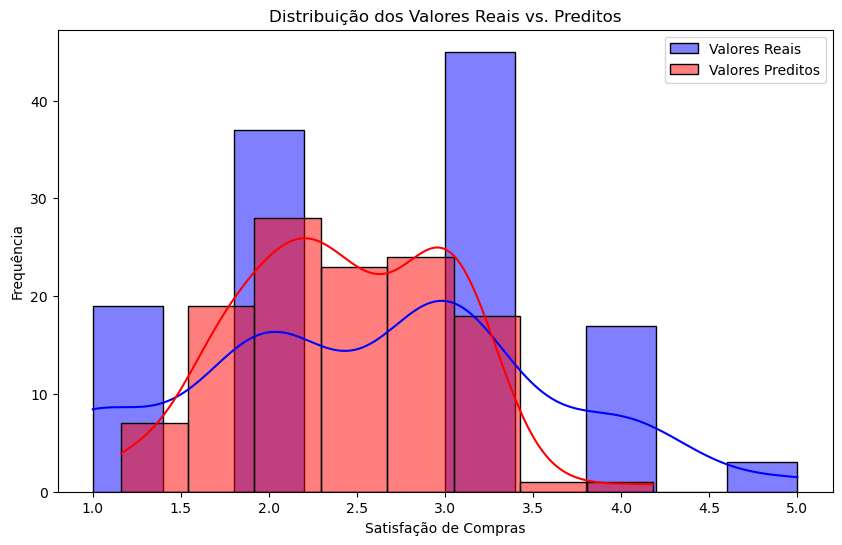

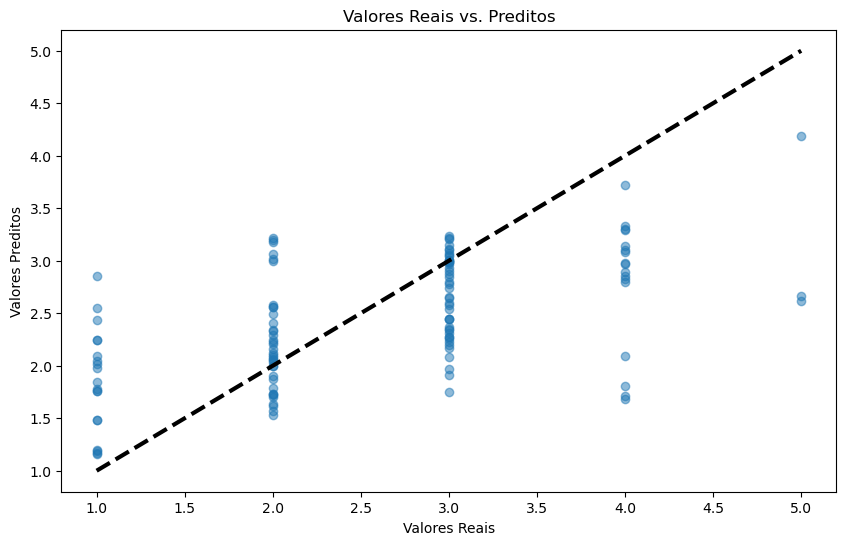


Mean Absolute Error (MAE): 0.6161217542753714
Mean Squared Error (MSE): 0.6863325263483415


In [102]:
# Histograma dos Valores Reais vs. Preditos
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Valores Reais', kde=True)
sns.histplot(y_pred, color='red', label='Valores Preditos', kde=True)
plt.legend()
plt.title('Distribuição dos Valores Reais vs. Preditos')
plt.xlabel('Satisfação de Compras')
plt.ylabel('Frequência')
plt.show()

# Gráfico de Dispersão dos Valores Reais vs. Preditos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs. Preditos')
plt.show()

# Métricas de Avaliação
print('\n==========================================================')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print('==========================================================')
